# 🎯 Objective¶
The goal of this project is to develop a model capable of classifying ultrasonic sounds emitted by plants under various stress conditions. This approach aims to provide insights into plant health by recognizing specific stress signals, enabling early and non-invasive monitoring of plant conditions in environments such as agriculture and research.

# 📁 Dataset¶
Recorded Plant Sounds from: Sounds emitted by plants under stress are airborne and informative. Includes recordings of plant sounds emitted from stressed plants, and sounds from empty environments Each directory consists of .wav files that are recordings of sounds according to the directory's name (e.g. Tomato Dry - sounds from tomatoes experiencing a drought stress). The wav files' names are of the format id_sound, were plant_id is an identifier of the plant recorded, and sound_id is an incrementing identifier of the sound recorded per plant_id. If the recording isn't of a plant (e.g. Empty Pot), the plant_id represents a recording instance. .

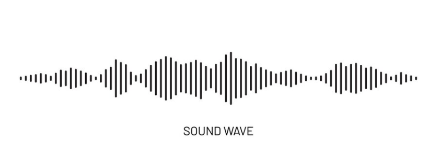

# Importing the libraries

In [3]:
import os
import numpy as np
import librosa
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Feature Engineering¶¶
Before building any sort of predictive models, we not only need data - but we need a usable representation. Enter feature engineering.

An audio file can be represented as a time series with the dependent axis being the amplitude of the audio waveform. The waveform of the sound file is all the information we have with which to create features to train our model. However, the shape of a waveform does not carry enough discriminating information, so we need to transform the waveform into a more useable form, pun intended.

Sometimes our input dataset does have enough information to train a model to give accurate results - but even then input data should be scrutinized and transformed - this allows us to pick the best model for our features, which is usually much better and different than a model that works on our raw input data. Proper feature engineering carries advantages not limited to

More accurate, generalizable models Insight into model's decision-making behaviour Flexibility in choice of models Faster training

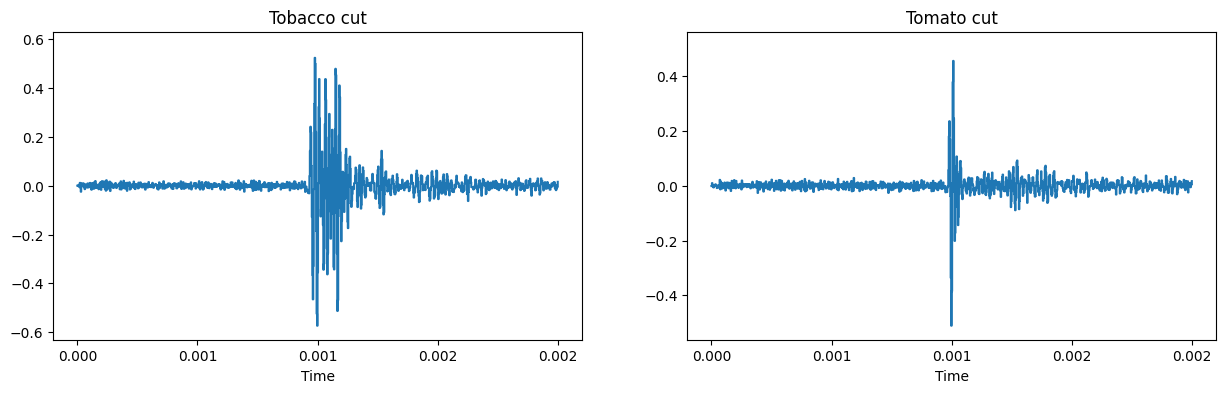

In [4]:
import soundfile
with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Tobacco Cut/id_126_sound_1.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Tobacco cut')

with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Tomato Cut/id_121_sound_1.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Tomato cut')

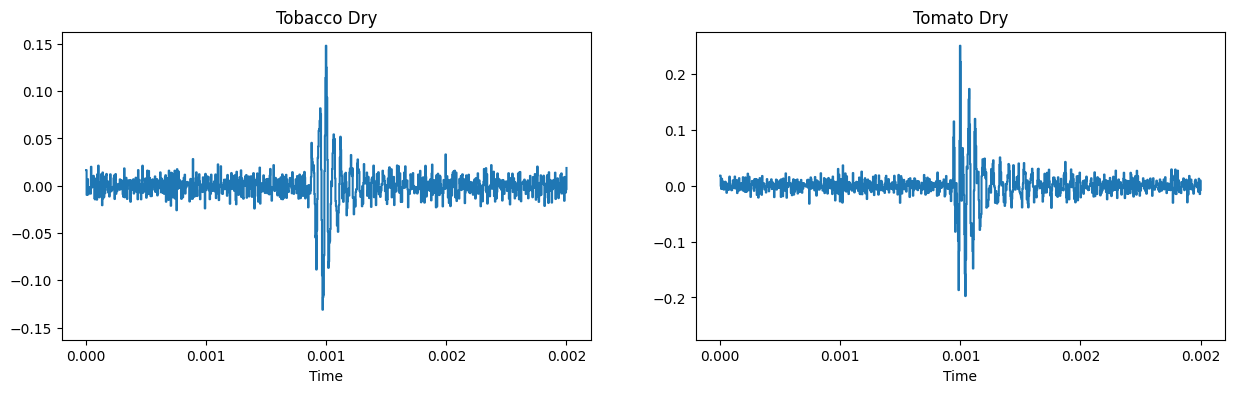

In [5]:
with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Tobacco Dry/id_10_sound_1.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Tobacco Dry')

with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Tomato Dry/id_101_sound_10.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Tomato Dry')

The spectrogram of the Tobacco cut exhibits a pronounced high-amplitude spike, indicative of a sharp, impulsive sound associated with the cutting action. In contrast, the Tomato cut shows a more dispersed energy distribution across frequencies, characterized by multiple smaller spikes, suggesting a complex sound with varied frequency components. The frequency content for Tobacco cut is concentrated in a narrow band, reflecting a relatively simple sound with limited variation. Conversely, the Tomato cut displays a broader frequency range, likely resulting from the different textures and properties of the tomato compared to tobacco. Our analysis concentrates on a short segment of 2 milliseconds surrounding the identified peak. Specifically, we extract a processed recording that includes 1 millisecond before and 1 millisecond after the peak sound, capturing the dynamics of the sound event in detail. We can conclude from spectrograms different classes exhibit distinct acoustic features.

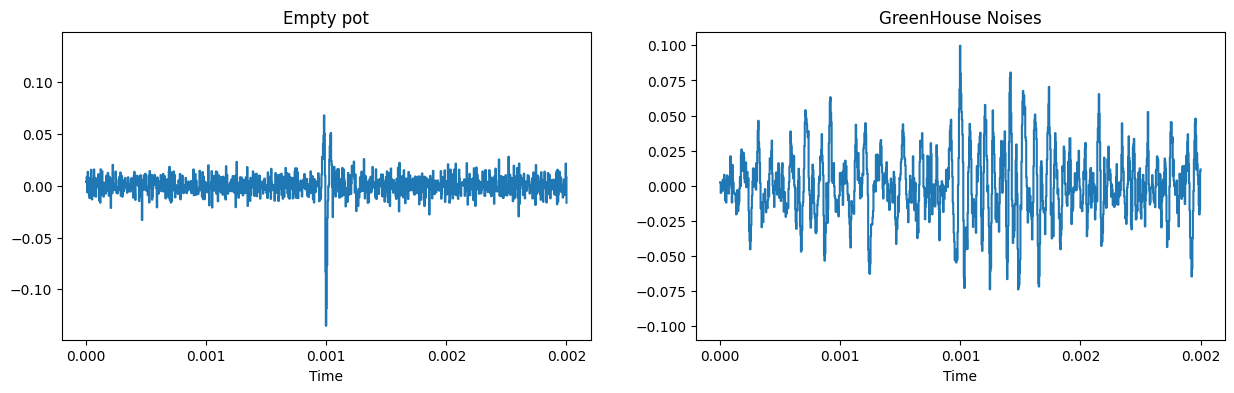

In [6]:
with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Empty Pot/id_0_sound_100.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.figure(figsize=(15,4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('Empty pot')

with soundfile.SoundFile('/kaggle/input/dataset1/PlantSound/Greenhouse Noises/id_0_sound_102.wav') as audio:
    waveform = audio.read(dtype="float32")
    sample_rate = audio.samplerate
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(waveform, sr=sample_rate)
    plt.title('GreenHouse Noises')

In [21]:

  import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Define the extract_mfcc function
def extract_mfcc(file_path, n_mfcc=13):
    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfcc.T  # Transpose to have shape (time, n_mfcc)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Paths to directories
audio_root_dir = '/kaggle/input/dataset1'  # Replace with your directory
mfcc_list = []
labels = []

# Traverse directories and process files
for subdir, dirs, files in os.walk(audio_root_dir):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(subdir, file)
            mfcc = extract_mfcc(file_path)
            if mfcc is not None:
                mfcc_list.append(mfcc)
                labels.append(subdir.split('/')[-1])  # Assuming folder name is the label

# Check if any files were processed
if len(mfcc_list) == 0:
    print("No .wav files were processed. Please check your file paths and directory structure.")
else:
    print(f"Successfully processed {len(mfcc_list)} .wav files.")

# Convert to numpy arrays
X = np.array(mfcc_list)
X = X[..., np.newaxis]  # Adding a channel dimension for CNN (shape: samples, height, width, 1)

# Prepare labels and split the dataset
if X.size > 0:
    le = LabelEncoder()
    y = le.fit_transform(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    print("Data preparation complete. Ready for training.")
else:
    print("Error: No data available for training.")



/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1001
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Successfully processed 7468 .wav files.
Data preparation complete. Ready for training.


# Model Building

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [9]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = Sequential()
model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 2, 13, 32)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 6, 64)       │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 0, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 0, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 0, 3, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 0, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 0, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 0)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,110 (168.40 KB)

 Trainable params: 43,110 (168.40 KB)

 Non-trainable params: 0 (0.00 B)

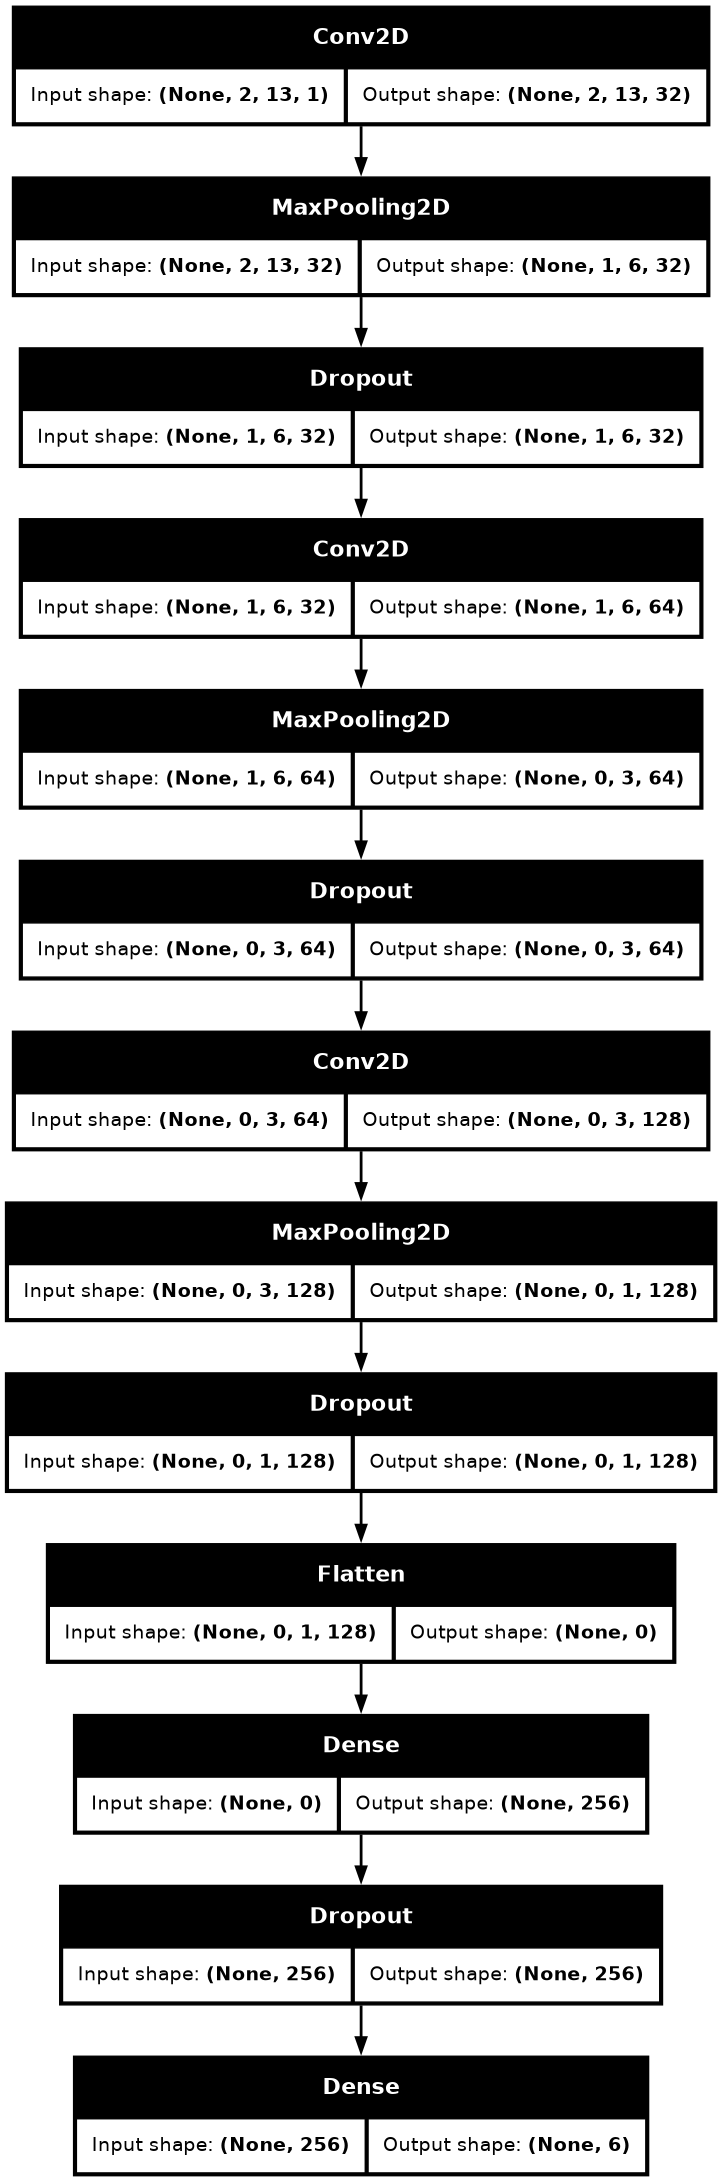

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, dpi=100)


# Model Training

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
input_shape = (X_train.shape[1], X_train.shape[2], 1)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(2, 13, 1)),  # Adjust input shape
    MaxPooling2D(pool_size=(1, 2)),  # Adjust pooling size as needed
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(1, 2)),  # Adjust pooling size as needed
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust number of classes as needed
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Train the model
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stopping, reduce_lr], 
                    verbose=1)

# Evaluate the model
model.evaluate(X_test, y_test)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3911 - loss: 3.2532 - val_accuracy: 0.6051 - val_loss: 0.9470 - learning_rate: 0.0010
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5840 - loss: 1.0642 - val_accuracy: 0.6312 - val_loss: 0.9307 - learning_rate: 0.0010
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6066 - loss: 0.9824 - val_accuracy: 0.6499 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6455 - loss: 0.8769 - val_accuracy: 0.6499 - val_loss: 0.8302 - learning_rate: 0.0010
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6153 - loss: 0.9175 - val_accuracy: 0.6319 - val_loss: 0.8698 - learning_rate: 0.0010
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6394 - loss: 0.8379 - val_accuracy: 0.6613 - val_loss: 0.7895 - learning_rate: 0.0010
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6535 - loss: 0.8184 - val_accurac

[0.7051699757575989, 0.7074966430664062]

In [15]:
test_files = [
    ("/kaggle/input/plantsounds/Tobacco Dry/id_11_sound_11.wav", "Tobacco Dry"),
    ("/kaggle/input/plantsounds/Tomato Cut/id_123_sound_5.wav","Tomato Cut"),
    ("/kaggle/input/plantsounds/Tobacco Cut/id_126_sound_12.wav","Tobacco Cut"),
    ("/kaggle/input/plantsounds/Tomato Dry/id_101_sound_19.wav","Tomato Dry"),
    ("/kaggle/input/plantsounds/Tobacco Dry/id_13_sound_10.wav","Tobacco Dry")
    
]

In [16]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Training Accuracy: {train_accuracy:.4f}")

Final Training Loss: 0.5411
Final Training Accuracy: 0.7816


In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.4f}")

Final Test Loss: 0.7052
Final Test Accuracy: 0.7075


# Evaluation of model

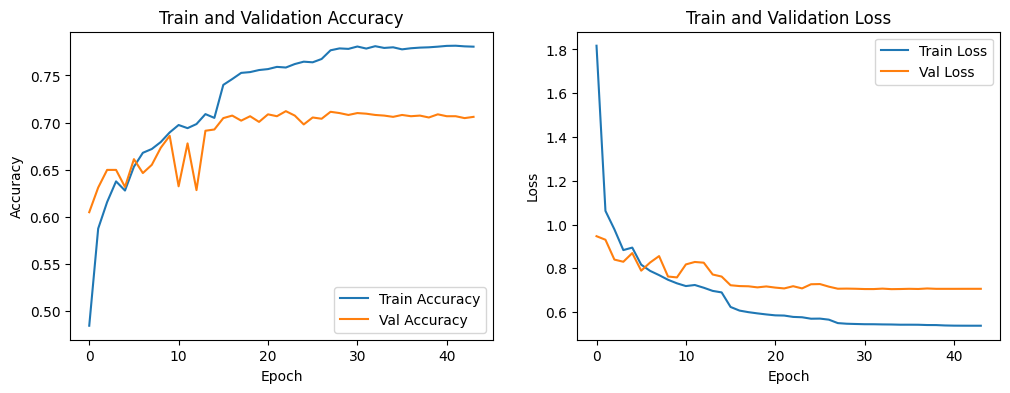

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')

plt.show()


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.7075
Precision: 0.7067
Recall: 0.7075
F1 Score: 0.7023


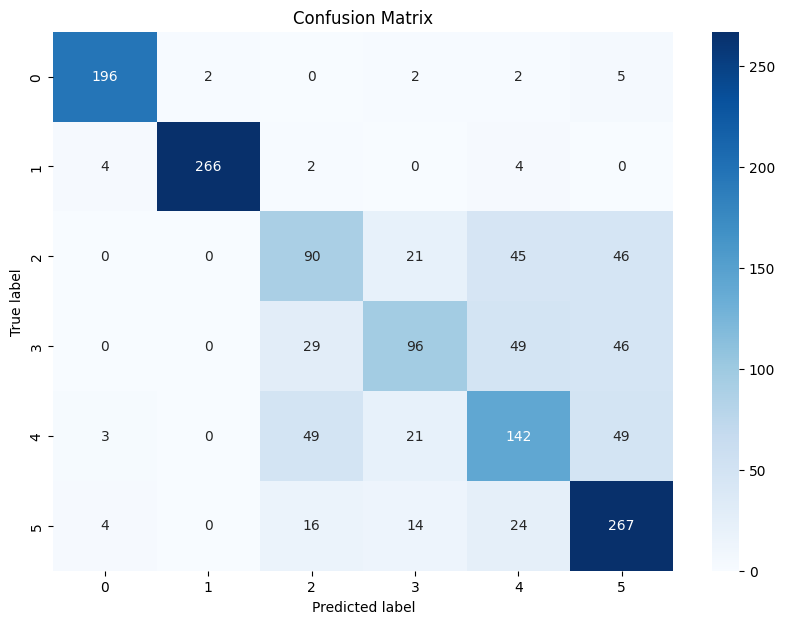

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       207
           1       0.99      0.96      0.98       276
           2       0.48      0.45      0.46       202
           3       0.62      0.44      0.51       220
           4       0.53      0.54      0.54       264
           5       0.65      0.82      0.72       325

    accuracy                           0.71      1494
   macro avg       0.70      0.69      0.69      1494
weighted avg       0.71      0.71      0.70      1494



In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict class probabilities and convert to class labels
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = y_test  # Assuming y_test contains true class labels directly

# Metrics Calculation
accuracy = accuracy_score(Y_true, Y_pred_classes)
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')

# Print Metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y_true), yticklabels=np.unique(Y_true))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(Y_true, Y_pred_classes))


In [19]:
from sklearn.metrics import average_precision_score
import numpy as np

# Convert true labels and predictions to binary format for each class
n_classes = len(np.unique(y_test))
y_true_binary = np.eye(n_classes)[y_test]  # One-hot encode true labels
y_pred_probs = model.predict(X_test)  # Predicted probabilities for each class

# Calculate Average Precision (AP) for each class
average_precisions = []
for i in range(n_classes):
    ap = average_precision_score(y_true_binary[:, i], y_pred_probs[:, i])
    average_precisions.append(ap)

# Calculate Mean Average Precision (mAP)
mAP = np.mean(average_precisions)

# Display results
print(f"Average Precision (AP) for each class: {average_precisions}")
print(f"Mean Average Precision (mAP): {mAP:.4f}")


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Average Precision (AP) for each class: [0.9830036353799496, 0.9951897974638607, 0.4905188314014982, 0.6306711393910248, 0.5920668888577779, 0.7852083914499451]
Mean Average Precision (mAP): 0.7461
